In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os


In [2]:
Datadirectory = "train1/"

In [3]:
Classes = ["0","1","2","3","4","5","6"]

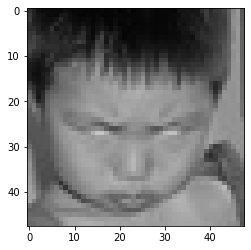

In [5]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

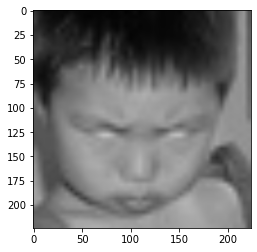

In [6]:
img_size= 224
new_array= cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
new_array.shape

(224, 224, 3)

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e :
                pass
                
        
        
        
        

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

28709


In [11]:
temp = np.array(training_Data)

C:\Users\PUSPKA~1\AppData\Local\Temp/ipykernel_9004/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


temp.shape()

In [12]:
temp.shape

(28709, 2)

In [13]:
import random
random.shuffle(training_Data)

In [18]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1 , img_size , img_size,3)

In [19]:
X.shape

(28709, 224, 224, 3)

In [20]:
y[546]

2

In [21]:
Y = np.array(y)

In [22]:
Y.shape

(28709,)

In [23]:
#deep learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2()   ##pre - trained MOdel

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [26]:
#transfer learning
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output) #for 7 calsses

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [26]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [31]:
new_model.compile(loss ="sparse_categorical_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [32]:
new_model.fit(X,Y , epochs = 25)

Epoch 1/25
898/898 [==============================] - 1691s 2s/step - loss: 1.2402 - accuracy: 0.5358
Epoch 2/25
898/898 [==============================] - 1645s 2s/step - loss: 1.0726 - accuracy: 0.5995
Epoch 3/25
898/898 [==============================] - 1423s 2s/step - loss: 0.9935 - accuracy: 0.6291
Epoch 4/25
898/898 [==============================] - 1392s 2s/step - loss: 0.9360 - accuracy: 0.6493
Epoch 5/25
898/898 [==============================] - 1385s 2s/step - loss: 0.8874 - accuracy: 0.6713
Epoch 6/25
898/898 [==============================] - 1376s 2s/step - loss: 0.8402 - accuracy: 0.6893
Epoch 7/25
898/898 [==============================] - 1390s 2s/step - loss: 0.7874 - accuracy: 0.7096
Epoch 8/25
898/898 [==============================] - 1419s 2s/step - loss: 0.7356 - accuracy: 0.7308
Epoch 9/25
898/898 [==============================] - 1421s 2s/step - loss: 0.6851 - accuracy: 0.7491
Epoch 10/25
898/898 [==============================] - 1447s 2s/step - loss: 0.641

In [33]:
new_model.save('my_modelforfacialonsept6.h5')

In [31]:
new_model = tf.keras.models.load_model('my_modelforfacialonsept6.h5')

In [104]:
frame = cv2.imread("img2.jpg")

In [105]:
frame.shape

(490, 612, 3)

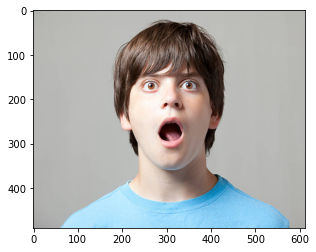

In [106]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [107]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [108]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [109]:
gray.shape

(490, 612)

In [110]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces :
    roi_gray =gray[y:y+h , x:x+w]
    roi_color =frame[y:y+h , x:x+w]
    cv2.rectangle(frame,(x,y) , (x+w,y+h) , (0,255,0), 12)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("face not detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey: ey+eh , ex:ex+ew]

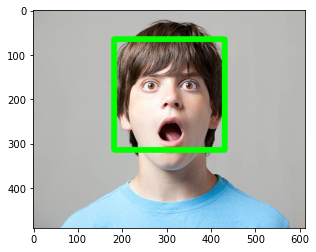

In [111]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

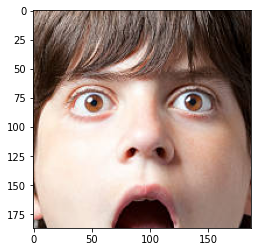

In [112]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [113]:
final_image = cv2.resize(face_roi ,(224,224))
final_image = np.expand_dims(final_image,axis =0)


In [114]:
pred = new_model.predict(final_image)

In [115]:
pred[0]

array([1.4948080e-03, 9.9942052e-05, 1.4153125e-02, 1.2270681e-03,
       1.0598775e-02, 2.0914766e-04, 9.7221720e-01], dtype=float32)

In [116]:
np.argmax(pred)

6

In [117]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 3.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)
img = np.zeros((500,500))

text = "some text in a box ! "
(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale,thickness =  1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width+2,text_offset_y - text_height -2))
cv2.rectangle(img ,box_coords[0],box_coords[1],rectangle_bgr , cv2.FILLED)
cv2.putText(img , text,(text_offset_x,text_offset_y),font,fontScale = font_scale,color = (0,0,0),thickness =  1)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOErrror(" cannot open webcam ")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    
    for x,y,w,h in faces :
        roi_gray =gray[y:y+h , x:x+w]
        roi_color =frame[y:y+h , x:x+w]
        cv2.rectangle(frame,(x,y) , (x+w,y+h) , (225,0,0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("face detected")
        else:
            for (ex,ey,ew,eh) in faces:
                face_roi = roi_color[ey: ey+eh , ex:ex+ew]
    final_image = cv2.resize(face_roi ,(224,224))
    final_image = np.expand_dims(final_image,axis =0)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    pred = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(pred)==0):
        status = "ANGRY"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10) , y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,255,0),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255))
    elif(np.argmax(pred)==1):
        status = "DISGUST"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255))
    elif(np.argmax(pred)==2):
        status = "neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(255,0,0),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255)) 
    elif(np.argmax(pred)==3):
        status = "HAPPY"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,0,255),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255))
        
    elif(np.argmax(pred)==4):
        status = "NEUTRAL"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(0,255,0),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255)) 
    elif(np.argmax(pred)==5):
        status = "SAD"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(255,0,0),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255)) 
    elif(np.argmax(pred)==6):
        status = "SURPRISE"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame , (x1,x1),(x1+w1 , y1+h1),(0,0,0),-1)
        cv2.putText(frame , status ,(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX , 0.7,(255,0,0),2)
        cv2.putText(frame,status , (100,150),font , 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame , (x,y), (x+w , y+h), (0,0,255))
    else:
        cv2.putText(frame,'no faces',(100,150),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
   
        
        


        
    cv2.imshow("facial expression recognition",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        

        
cap.release()
cv2.destroyAllWindows()



face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
face detected
